<a href="https://colab.research.google.com/github/uvdhatri/sarvam-ai-challenge/blob/main/sarvam_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download YouTube Video's Audio

In [ ]:
! pip install pytube -q

In [ ]:
from pytube import YouTube

In [ ]:
#VIDEO_URL = "https://youtu.be/Sby1uJ_NFIY?si=M6iyHaF6V1kRuT-e" #sarvam ai

In [ ]:
VIDEO_URL = 'https://youtu.be/Sby1uJ_NFIY?si=M6iyHaF6V1kRuT-e' #sarvam ai

In [ ]:
#VIDEO_URL = 'https://youtu.be/Sby1uJ_NFIY?si=M6iyHaF6V1kRuT-e'

In [ ]:
yt = YouTube(VIDEO_URL)

In [ ]:
yt.streams \
.filter(only_audio=True, file_extension='mp4') \
    .first() \
    .download(filename='ytaudio.mp4')

'/content/ytaudio.mp4'

In [ ]:
! ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

# English ASR with HuggingSound

In [ ]:
!pip install huggingsound -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 506.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is inco

In [ ]:
from huggingsound import SpeechRecognitionModel


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
device

'cpu'

In [ ]:
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device = device)


INFO:huggingsound.speech_recognition.model:Loading model...


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at jonatasgrosman/wav2vec2-large-xlsr-53-english and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
Y

preprocessor_config.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


vocab.json:   0%|          | 0.00/300 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

OUT OF MEMORY (OOM) error

# Audio Chunking

In [ ]:
import librosa

In [ ]:
input_file = '/content/ytaudio.wav'

In [ ]:
print(librosa.get_samplerate(input_file))

# Stream over 15 seconds chunks rather than load the full file
stream = librosa.stream(
    input_file,
    block_length=15,
    frame_length=16000,
    hop_length=16000
)

16000


In [ ]:
import soundfile as sf


In [ ]:
for i,speech in enumerate(stream):
  sf.write(f'{i}.wav', speech, 16000)

In [ ]:
i

105

# Audio Transcription / ASR / Speech to Text

In [ ]:
audio_path =[]
for a in range(i+1):
  audio_path.append(f'/content/{a}.wav')

In [ ]:
audio_path

['/content/0.wav',
 '/content/1.wav',
 '/content/2.wav',
 '/content/3.wav',
 '/content/4.wav',
 '/content/5.wav',
 '/content/6.wav',
 '/content/7.wav',
 '/content/8.wav',
 '/content/9.wav',
 '/content/10.wav',
 '/content/11.wav',
 '/content/12.wav',
 '/content/13.wav',
 '/content/14.wav',
 '/content/15.wav',
 '/content/16.wav',
 '/content/17.wav',
 '/content/18.wav',
 '/content/19.wav',
 '/content/20.wav',
 '/content/21.wav',
 '/content/22.wav',
 '/content/23.wav',
 '/content/24.wav',
 '/content/25.wav',
 '/content/26.wav',
 '/content/27.wav',
 '/content/28.wav',
 '/content/29.wav',
 '/content/30.wav',
 '/content/31.wav',
 '/content/32.wav',
 '/content/33.wav',
 '/content/34.wav',
 '/content/35.wav',
 '/content/36.wav',
 '/content/37.wav',
 '/content/38.wav',
 '/content/39.wav',
 '/content/40.wav',
 '/content/41.wav',
 '/content/42.wav',
 '/content/43.wav',
 '/content/44.wav',
 '/content/45.wav',
 '/content/46.wav',
 '/content/47.wav',
 '/content/48.wav',
 '/content/49.wav',
 '/content

In [ ]:
transcriptions = model.transcribe(audio_path)

100%|██████████| 106/106 [23:23<00:00, 13.24s/it]


In [ ]:
full_transcript = ' '

In [ ]:
for item in transcriptions:
  full_transcript += ''.join(item['transcription'])

In [ ]:
len(full_transcript)

20516

In [ ]:
sentences = full_transcript

In [ ]:
print(sentences)

 congratulations to you mr ragowin for that thank you so much for joining us overteahe everybody how are youam not hearing this at all it is like a postlancha energy downear or somethinglet's hear it arygays a wakeall right you bet ter be because we have a superstar guest her you heard the forty-one million dollars i didn'tontanyi she said after tatoasks for about forty million dollars from by the end of this conversationbut let' get started i want introduced evek anpratyush's co-founder was not herewe wanted to start with playing a video or of what open hearthe does encourage all of you to go to the website surround and check it outbtemest by introducing ak's deal friendhe is vey very modest one of the most modest guys that i know but his personal journey k youv been phd from cannigmilin you souded and sold the company to magma and andi moved back to india from bot invallesame day actually in yuben in india for the last sixteen years and hamost people don't knows urjonia adhar he spen

(OR)

**Installing libraries**

In [ ]:
pip install pydub

In [ ]:
pip install pytube


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 724.8 kB/s eta 0:00:00


In [ ]:
import pytube
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import Audio, display
from transformers import pipeline

**Downloading the youtube video and Converting into audio**

In [ ]:
# Function to download video and extract audio
def download_and_extract_audio(youtube_link, output_path):
    #Downloading the Youtube Video
    yt = pytube.YouTube(youtube_link)

    # Filter the available streams to include only audio streams, and select the first one
    video = yt.streams.filter(only_audio=True).first()

    # Download the selected audio stream and save it to the specified output directory with the filename 'audio'
    video.download(output_path=output_path, filename='audio')

    return output_path + '/audio.mp4'

**Specifying the youtube Link and directory to store the extracted audio**

In [ ]:
youtube_link = "https://www.youtube.com/watch?v=Sby1uJ_NFIY"
output_path = "./"
audio_file_path = download_and_extract_audio(youtube_link, output_path)
print("Audio extracted successfully:", audio_file_path)

Audio extracted successfully: .//audio.mp4


**pipeline for automatic speech recognition (ASR) using Hugging Face's Transformers library**





In [ ]:
# Initialize the pipeline
whisper = pipeline('automatic-speech-recognition', model='openai/whisper-medium')


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


**Translate speech to text**

In [ ]:
transcript = whisper('audio')

In [ ]:
transcript

{'text': " Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to the website, savrom.ai, and check it out. But let me start by introducing Vivek. Vivek is a dear friend, and he's very, very modest. One of the most modest guys that I know. But his personal journey, Vivek, you've got a PhD from Carnegie Mellon. You started and sold the company to Magma. And Vivek

In [ ]:
#taking the value inside the 'text' key to perform semantic chunking
transcript=transcript['text']
print(transcript)

 Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to the website, savrom.ai, and check it out. But let me start by introducing Vivek. Vivek is a dear friend, and he's very, very modest. One of the most modest guys that I know. But his personal journey, Vivek, you've got a PhD from Carnegie Mellon. You started and sold the company to Magma. And Vivek and I mov

**semantic chunking**

In [ ]:
audio_path = "/content/audio"

In [ ]:
# Function to get the duration of the audio file in seconds
def get_audio_duration(audio_path):
    audio = AudioSegment.from_file(audio_path)
    return len(audio) / 1000.0  # Duration in seconds

In [ ]:
from pydub import AudioSegment

# Function to perform semantic chunking
def semantic_chunking(transcript, total_duration, max_chunk_duration=15):
    """
    Chunks the transcript into pieces where each piece has a duration of less than 15 seconds.

    Parameters:
    transcript (str): The complete transcript of the audio.
    total_duration (float): The total duration of the audio in seconds.
    max_chunk_duration (int): The maximum allowed duration for each chunk.

    Returns:
    List[str]: List of transcript chunks.
    """
    # Splits the transcript string into a list of words
    words = transcript.split()

    # Calculate average duration per word
    word_duration = total_duration / len(words)

    # Calculate number of words per chunk to ensure chunks are less than 15 seconds
    chunk_size = int(max_chunk_duration / word_duration)

    chunks = []
    start_idx = 0

    while start_idx < len(words):
        end_idx = min(start_idx + chunk_size, len(words))

        # Find the nearest sentence end to the chunk size limit
        if end_idx < len(words):
            while end_idx > start_idx :
                end_idx -= 1
            if end_idx == start_idx:  # No sentence end found within limit, use chunk size
                end_idx = start_idx + chunk_size

        chunk_text = ' '.join(words[start_idx:end_idx])
        chunks.append(chunk_text)
        start_idx = end_idx

    return chunks

In [ ]:
# Get the total duration of the audio
total_duration = get_audio_duration(audio_path)

# Perform semantic chunking
chunks = semantic_chunking(transcript, total_duration)
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk}")

Chunk 1: Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are
Chunk 2: you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him
Chunk 3: by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to
Chunk 4: the website, savrom.ai, and check it out. But let me start by introducing Vivek. Vivek is a dear friend, and he's very, very modest. One of the most modest guys that I know. But his personal journey, Vivek, you've got a PhD from
Chunk 5: Carnegie Mellon. You started and so

In [ ]:
chunks

["Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are",
 "you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him",
 "by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to",
 "the website, savrom.ai, and check it out. But let me start by introducing Vivek. Vivek is a dear friend, and he's very, very modest. One of the most modest guys that I know. But his personal journey, Vivek, you've got a PhD from",
 "Carnegie Mellon. You started and sold the company to Magma. An

Generating the text chunks into the desired output

In [ ]:
import os
from pydub import AudioSegment
import librosa
import matplotlib.pyplot as plt



# Function to generate output in the specified format
def generate_output(chunks, total_duration):
    output_list = []
    start_time = 0.0

    # Calculate the average duration per word
    total_words = sum(len(chunk.split()) for chunk in chunks)
    average_word_duration = total_duration / total_words

    for i, chunk_text in enumerate(chunks):
        # Calculate the length of the current chunk in seconds based on word count
        chunk_words = len(chunk_text.split())
        chunk_length = chunk_words * average_word_duration

        # Calculate the end time of the current chunk
        end_time = start_time + chunk_length

        # Append a dictionary representing the current chunk to the output list
        output_list.append({
            "chunk_id": i + 1,
            "chunk_length": chunk_length,
            "text": chunk_text,
            "start_time": start_time,
            "end_time": end_time
        })
        start_time = end_time
    return output_list

In [ ]:
output_list = generate_output(chunks,total_duration)

In [ ]:
# Print the output
for chunk in output_list:
    print(chunk)

{'chunk_id': 1, 'chunk_length': 14.682724257533057, 'text': "Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are", 'start_time': 0.0, 'end_time': 14.682724257533057}
{'chunk_id': 2, 'chunk_length': 14.682724257533057, 'text': "you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him", 'start_time': 14.682724257533057, 'end_time': 29.365448515066113}
{'chunk_id': 3, 'chunk_length': 14.682724257533057, 'text': "by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to", 'st

In [ ]:
# Get the total duration of the audio
total_duration = get_audio_duration(audio_path)

# Perform semantic chunking
chunks = semantic_chunking(transcript, total_duration)
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk}")

Chunk 1: Congratulations to you Mr. Raghavan for that. Thank you so much for joining us. Over to you. Hi everybody. How are you? Okay, I am not hearing this at all. This is like a post-lunch energy downer or something. Let's hear it. Are
Chunk 2: you guys awake? Yes. Alright. You better be because we have a superstar guest here. You heard the 41 million dollars and I didn't hear honestly anything she said after that. So we're going to ask for about 40 million dollars from him
Chunk 3: by the end of this conversation, okay? But let's get started. I want to introduce Vivek and Pratyush, his co-founder who's not here. We wanted to start with playing a video of what OpenHati does. I encourage all of you to go to
Chunk 4: the website, savrom.ai, and check it out. But let me start by introducing Vivek. Vivek is a dear friend, and he's very, very modest. One of the most modest guys that I know. But his personal journey, Vivek, you've got a PhD from
Chunk 5: Carnegie Mellon. You started and so

In [ ]:
!pip install gradio -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s et

**Bonus-1: Gradio-App Interface:**
To create a Gradio app that takes a YouTube link as input and displays the semantic chunks

In [ ]:
import gradio as gr
from pytube import YouTube
import os
from huggingsound import SpeechRecognitionModel
import torch
import librosa
import soundfile as sf
import nltk
from nltk.tokenize import sent_tokenize

# Ensure necessary data is downloaded
nltk.download('punkt')

# Define the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize the speech recognition model
model = SpeechRecognitionModel("jonatasgrosman/wav2vec2-large-xlsr-53-english", device=device)

def transcribe_youtube_video(url):
    # Download video and extract audio
    yt = YouTube(url)
    audio_stream = yt.streams.filter(only_audio=True, file_extension='mp4').first()
    audio_stream.download(filename='ytaudio.mp4')
    os.system('ffmpeg -i ytaudio.mp4 -acodec pcm_s16le -ar 16000 ytaudio.wav')

    # Stream over 15 seconds chunks
    input_file = 'ytaudio.wav'
    stream = librosa.stream(
        input_file,
        block_length=15,
        frame_length=16000,
        hop_length=16000
    )

    # Create directory to save chunks
    os.makedirs('chunks', exist_ok=True)

    # Save the chunks
    for i, speech in enumerate(stream):
        sf.write(f'chunks/{i}.wav', speech, 16000)

    # List of paths to chunk files
    audio_paths = [f'chunks/{i}.wav' for i in range(len(os.listdir('chunks')))]

    # Transcribe the chunks
    transcriptions = model.transcribe(audio_paths)

    # Combine the transcriptions
    full_transcript = ' '.join([''.join(item['transcription']) for item in transcriptions])

    # Segment the full transcript into sentences
    sentences = sent_tokenize(full_transcript)

    # Generate the output list
    output_list = []
    current_start_time = 0.0

    for i, sentence in enumerate(sentences):
        # Calculate the length of the sentence audio chunk
        duration = librosa.get_duration(filename=audio_paths[i])
        chunk_length = min(15.0, duration)

        output_list.append({
            "chunk_id": i + 1,
            "chunk_length": chunk_length,
            "text": sentence,
            "start_time": current_start_time,
            "end_time": current_start_time + chunk_length
        })

        # Update the current start time
        current_start_time += chunk_length

    return output_list

# Create the Gradio interface
gr_interface = gr.Interface(
    fn=transcribe_youtube_video,
    inputs=gr.Textbox(lines=1, placeholder="https://www.youtube.com/watch?v=Sby1uJ_NFIY"),
    outputs=gr.JSON(),
    title="YouTube Video Semantic Chunker",
    description="Enter a YouTube URL to get semantic chunks of the video's audio."
)

# Launch the Gradio app
gr_interface.launch()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
INFO:huggingsound.speech_recognition.model:Loading model...
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://49c84d9bebb5015431.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


**Bonus-2: Utilizing Ground-Truth Transcripts:**
To improve transcription quality using a ground-truth transcript, you can use alignment algorithms such as Dynamic Time Warping (DTW). Here’s an outline of how you might approach this:

Transcribe the audio using the ASR model.
Align the ASR output with the ground-truth transcript using DTW to find the best matching segments.
Correct the ASR output based on the alignment, replacing ASR segments with ground-truth text where appropriate


Explanation:

1. **Tokenization**: The ASR transcription and the ground truth transcription are tokenized into words using `nltk.word_tokenize`.
2. **Cost Matrix Initialization**: A cost matrix is initialized where the cost of mismatching words is set to 1, and matching words is 0.
3. **DTW Algorithm**: The cost matrix is filled based on the minimal cost path using dynamic time warping.
4. **Alignment**: The best alignment path is traced back from the bottom-right to the top-left of the cost matrix.
5. **Correction**: The corrected transcription is generated based on the alignment.

This code ensures that your ASR transcription is aligned with the ground truth transcription, improving the overall quality of the transcription.

Method to Improve Transcript Quality Using Ground-Truth Transcript
Hypothesis:

By aligning the ASR-generated transcript with a provided ground-truth transcript using dynamic time warping (DTW) or similar alignment techniques, we can significantly improve the accuracy of the ASR output. The alignment process will correct errors in the ASR transcript by matching the ASR tokens with the corresponding ground-truth tokens, thereby leveraging the high-quality ground-truth data to refine the transcription.

Proposed Method:
Preprocessing:

Tokenization: Tokenize both the ASR-generated transcript and the ground-truth transcript into words or subwords. This ensures that the alignment process works at the appropriate granularity.
Normalization: Convert both transcripts to a common format (e.g., lowercasing, removing punctuation) to minimize mismatches due to case or punctuation differences.
Dynamic Time Warping (DTW) Alignment:

Cost Matrix Calculation: Use DTW to compute a cost matrix based on word similarity. The cost can be defined as 0 for exact matches and 1 for mismatches, with penalties for insertions and deletions.
Alignment Path: Trace back through the cost matrix to find the optimal alignment path between the ASR transcript and the ground-truth transcript.
Transcript Correction:

Alignment Mapping: Map the ASR tokens to the corresponding ground-truth tokens using the alignment path.
Correction Application: Replace the ASR tokens with the ground-truth tokens as per the alignment, thereby correcting errors in the ASR transcript.
Post-processing:

Formatting: Convert the corrected transcript back to its original format (e.g., reinserting punctuation, restoring case).
Validation: Optionally, validate the corrected transcript against the audio to ensure that the alignment did not introduce new errors.
Implementation Steps:
Tokenization and Normalization:

Tokenize and normalize both transcripts to ensure consistency in the alignment process.
DTW-based Alignment:

Use DTW to align the ASR and ground-truth tokens, calculating the optimal path that minimizes the alignment cost.
Correction Application:

Replace ASR tokens with ground-truth tokens based on the DTW alignment, ensuring that each ASR token is matched with the most appropriate ground-truth token.
Advantages of This Approach:
Precision
Error Correction
Context Preservation

In [ ]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 11.7 MB/s eta 0:00:00


**Accuracy**

In [ ]:
from transformers import pipeline
from jiwer import wer, cer

# Initialize the Whisper pipeline
whisper = pipeline('automatic-speech-recognition', model='openai/whisper-medium')

def transcribe_audio(audio_path):
    result = whisper(audio_path)
    return result['text']

def evaluate_transcriptions(audio_paths, ground_truths):
    total_wer = 0
    total_cer = 0
    for audio_path, ground_truth in zip(audio_paths, ground_truths):
        predicted_transcription = transcribe_audio(audio_path)
        total_wer += wer(ground_truth, predicted_transcription)
        total_cer += cer(ground_truth, predicted_transcription)
    average_wer = total_wer / len(audio_paths)
    average_cer = total_cer / len(audio_paths)
    return average_wer, average_cer

# Example data
audio_paths = ["/content/audio"]
ground_truths = ["ground truth for audio1"]

# Evaluate the model
average_wer, average_cer = evaluate_transcriptions(audio_paths, ground_truths)
print(f"Average WER: {average_wer}")
print(f"Average CER: {average_cer}")


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


Average WER: 1152.75
Average CER: 1068.304347826087


**Task-2**

Importing Necessary Modules for Web Scrapping

In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00


In [ ]:
pip install webdriver_manager

In [ ]:
pip install selenium requests beautifulsoup4

Web Scrapping using Selenium and Beautiful Soup

In [ ]:
 #Books and their chapter counts
info = {'MAT': 28, 'MRK': 16,'LUK':24,'JHN':21,'ACT':21,'ROM':11,'1CO':16,'2CO':13,'GAL':6,
         'EPH':6,'PHP':4,'COL':4,'1TH':5,'2TH':3,'1TI':6,'2TI':4,'TIT':3,'PHM':1,'HEB':13,'JAS':5,
         '1PE':5,'2PE':3,'1JN':5,'2JN':1,'3JN':1,'JUD':1,'REV':22}

In [ ]:
import os
import time
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

In [ ]:
# Global settings
text_dir = 'text_files'  # Directory to save text files
audio_dir = 'audio_files'  # Directory to save audio files
base_url = 'https://live.bible.is/bible/MALNIB/'  # Base URL for the Bible website
page_load_timeout = 50  # Page load timeout in seconds
implicit_wait_time = 40  # Implicit wait time for Selenium in seconds

In [ ]:
def download_file(url, filename):
    """
    Downloads a file from a URL and saves it locally.
    """
    try:
        response = requests.get(url)  # Send a GET request to the URL
        response.raise_for_status()  # Raise an exception for HTTP errors
        with open(filename, 'wb') as file:  # Open a file for writing in binary mode
            file.write(response.content)  # Write the content of the response to the file
        print(f"Downloaded: {filename}")  # Print success message
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")  # Print error message if download fails

In [ ]:
def extract_text(chapter_url):
    """
    Extracts text from a chapter URL.
    """
    text_content = ''
    try:
        response = requests.get(chapter_url)  # Send a GET request to the chapter URL
        response.raise_for_status()  # Raise an exception for HTTP errors
        soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content with BeautifulSoup
        verse_elements = soup.find_all("span", {"data-verseid": True})  # Find all span elements with a data-verseid attribute
        text_content = "\n".join(verse.get_text(strip=True) for verse in verse_elements)  # Extract text from each verse element and join with newline
    except requests.exceptions.RequestException as e:
        print(f"Failed to extract text from {chapter_url}: {e}")  # Print error message if extraction fails
    return text_content  # Return the extracted text

In [ ]:
def extract_audio(chapter_url):
    """
    Extracts audio URLs from a chapter URL.
    """
    audio_urls = []
    try:
        chrome_options = Options()
        chrome_options.add_argument('--headless')  # Run Chrome in headless mode (without GUI)
        chrome_options.add_argument('--no-sandbox')  # Disable the sandbox for Chrome
        chrome_options.add_argument('--disable-dev-shm-usage')  # Disable shared memory usage for Chrome
        chrome_options.add_argument('--enable-javascript')  # Enable JavaScript in Chrome

        driver = webdriver.Chrome(options=chrome_options)  # Initialize the Chrome WebDriver with the specified options
        driver.set_page_load_timeout(page_load_timeout)  # Set the page load timeout
        driver.implicitly_wait(implicit_wait_time)  # Set the implicit wait time

        driver.get(chapter_url)  # Navigate to the chapter URL
        wait = WebDriverWait(driver, 150)  # Initialize a WebDriverWait with a timeout of 150 seconds
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, "audio-player-background")))  # Wait until the audio player background is present

        soup = BeautifulSoup(driver.page_source, "html.parser")  # Parse the page source with BeautifulSoup

        audio_players = soup.find_all("video", {"class": "audio-player"})  # Find all video elements with the class "audio-player"
        audio_urls = [audio_player.get("src") for audio_player in audio_players if audio_player.has_attr("src")]  # Extract the src attribute of each audio player

        driver.quit()  # Quit the WebDriver
    except Exception as e:
        print(f"Failed to extract audio from {chapter_url}: {e}")  # Print error message if extraction fails
        if driver:
            driver.quit()  # Quit the WebDriver if an exception occurs
    return audio_urls  # Return the list of audio URL

In [ ]:
def extract_text_and_audio(book_id, chapter):
    """
    Extracts text and audio from a specific chapter of a book.
    """
    chapter_url = f"{base_url}/{book_id}/{chapter}"  # Construct the chapter URL

    text_content = extract_text(chapter_url)  # Extract text from the chapter URL
    text_filename = os.path.join(text_dir, f"{book_id}_{chapter}.txt")  # Construct the text filename
    with open(text_filename, "w", encoding="utf-8") as text_file:  # Open the text file for writing with UTF-8 encoding
        text_file.write(text_content)  # Write the extracted text to the file
    print(f"Saved text: {text_filename}")  # Print success message

    audio_urls = extract_audio(chapter_url)  # Extract audio URLs from the chapter URL
    for idx, audio_url in enumerate(audio_urls, start=1):  # Iterate over the audio URLs
        if audio_url:
            audio_filename = os.path.join(audio_dir, f"{book_id}_{chapter}_{idx}.mp3")  # Construct the audio filename
            download_file(audio_url, audio_filename)  # Download the audio file


In [ ]:
def extract_all_text_and_audio():
    """
    Extracts text and audio for all chapters of all books.
    """
    os.makedirs(text_dir, exist_ok=True)  # Create the text directory if it doesn't exist
    os.makedirs(audio_dir, exist_ok=True)  # Create the audio directory if it doesn't exist

    # Process each book in the info dictionary
    for book_id, num_chapters in info.items():  # Iterate over the books and their chapter counts
        print('Processing book', book_id)  # Print the book ID being processed
        for chapter in range(1, num_chapters + 1):  # Iterate over the chapters of the book
            extract_text_and_audio(book_id, chapter)  # Extract text and audio for the chapter

In [ ]:
# Extract text and audio for all chapters of all books
extract_all_text_and_audio()

Processing book MAT
Saved text: text_files/MAT_1.txt
Downloaded: audio_files/MAT_1_1.mp3
Failed to extract text from https://live.bible.is/bible/MALNIB//MAT/2: 500 Server Error: Internal Server Error for url: https://live.bible.is/bible/MALNIB/MAT/2
Saved text: text_files/MAT_2.txt
Failed to extract audio from https://live.bible.is/bible/MALNIB//MAT/2: Message: 
Stacktrace:
#0 0x5b25181936aa <unknown>
#1 0x5b2517e760dc <unknown>
#2 0x5b2517ec2931 <unknown>
#3 0x5b2517ec2a21 <unknown>
#4 0x5b2517f07234 <unknown>
#5 0x5b2517ee589d <unknown>
#6 0x5b2517f045c3 <unknown>
#7 0x5b2517ee5613 <unknown>
#8 0x5b2517eb54f7 <unknown>
#9 0x5b2517eb5e4e <unknown>
#10 0x5b251815987b <unknown>
#11 0x5b251815d921 <unknown>
#12 0x5b251814536e <unknown>
#13 0x5b251815e482 <unknown>
#14 0x5b2518129ccf <unknown>
#15 0x5b25181830a8 <unknown>
#16 0x5b2518183280 <unknown>
#17 0x5b25181927dc <unknown>
#18 0x7ee192b3aac3 <unknown>

Saved text: text_files/MAT_3.txt
Downloaded: audio_files/MAT_3_1.mp3
Saved text: 

Organizing the Data by Chapters

In [ ]:
import os # Import the os module for interacting with the operating system
import shutil

In [ ]:
# Directories for storing organized data
organized_dir = '/content/organized data'
text_dir = '/content/text_files'
audio_dir = '/content/audio_files'

In [ ]:
# Create a directory to organize the data by chapters
os.makedirs(organized_dir, exist_ok=True)  # Create the organized directory if it doesn't exist

# Organize the data by chapters
for book_id in info:  # Iterate over each book in the info dictionary
    book_dir = os.path.join(organized_dir, book_id)  # Create a directory for the book
    os.makedirs(book_dir, exist_ok=True)  # Create the book directory if it doesn't exist

    num_chapters = info[book_id]  # Get the number of chapters for the current book
    for chapter in range(1, num_chapters + 1):  # Iterate over each chapter
        chapter_dir = os.path.join(book_dir, f'Chapter_{chapter}')  # Create a directory for the chapter
        os.makedirs(chapter_dir, exist_ok=True)  # Create the chapter directory if it doesn't exist

        # Move the text file
        text_filename = f"{book_id}_{chapter}.txt"  # Construct the text file name
        src_text_path = os.path.join(text_dir, text_filename)  # Construct the source path for the text file
        dest_text_path = os.path.join(chapter_dir, text_filename)  # Construct the destination path for the text file
        if os.path.exists(src_text_path):  # Check if the source text file exists
            shutil.move(src_text_path, dest_text_path)  # Move the text file to the destination

        # Move the audio files
        audio_filenames = [f for f in os.listdir(audio_dir) if f.startswith(f"{book_id}_{chapter}_")]  # Get all audio files for the current chapter
        for audio_filename in audio_filenames:  # Iterate over each audio file
            src_audio_path = os.path.join(audio_dir, audio_filename)  # Construct the source path for the audio file
            dest_audio_path = os.path.join(chapter_dir, audio_filename)  # Construct the destination path for the audio file
            if os.path.exists(src_audio_path):  # Check if the source audio file exists
                shutil.move(src_audio_path, dest_audio_path)  # Move the audio file to the destination

print("Data organized successfully.")  # Print a success message

Data organized successfully.


Analysis of Audio Duration and Text Length

In [ ]:
import librosa
import matplotlib.pyplot as plt

In [ ]:
# Function to get the duration of an audio file
def get_audio_duration(file_path):
    y, sr = librosa.load(file_path)
    return librosa.get_duration(y=y, sr=sr)

In [ ]:
# Initialize empty lists to store audio durations and text lengths
audio_durations = []
text_lengths = []

# Iterate over each book in the 'info' dictionary
for book_id in info:
    # Construct the path to the directory containing chapters for the current book
    book_dir = os.path.join(organized_dir, book_id)

    # Get the number of chapters for the current book from the 'info' dictionary
    num_chapters = info[book_id]

    # Iterate over each chapter of the current book
    for chapter in range(1, num_chapters + 1):
        # Construct the path to the directory of the current chapter
        chapter_dir = os.path.join(book_dir, f'Chapter_{chapter}')

        # Get the text length for the current chapter
        text_filename = f"{book_id}_{chapter}.txt"
        text_path = os.path.join(chapter_dir, text_filename)

        # Check if the text file exists for the current chapter
        if os.path.exists(text_path):
            # Open the text file and read its content
            with open(text_path, 'r', encoding='utf-8') as file:
                text_content = file.read()
                # Append the length of the text content to the 'text_lengths' list
                text_lengths.append(len(text_content))

        # Get the audio duration for the current chapter
        audio_filenames = [f for f in os.listdir(chapter_dir) if f.endswith('.mp3')]
        for audio_filename in audio_filenames:
            audio_path = os.path.join(chapter_dir, audio_filename)
            # Check if the audio file exists for the current chapter
            if os.path.exists(audio_path):
                # Calculate the duration of the audio file and append it to the 'audio_durations' list
                audio_duration = get_audio_duration(audio_path)
                audio_durations.append(audio_duration)

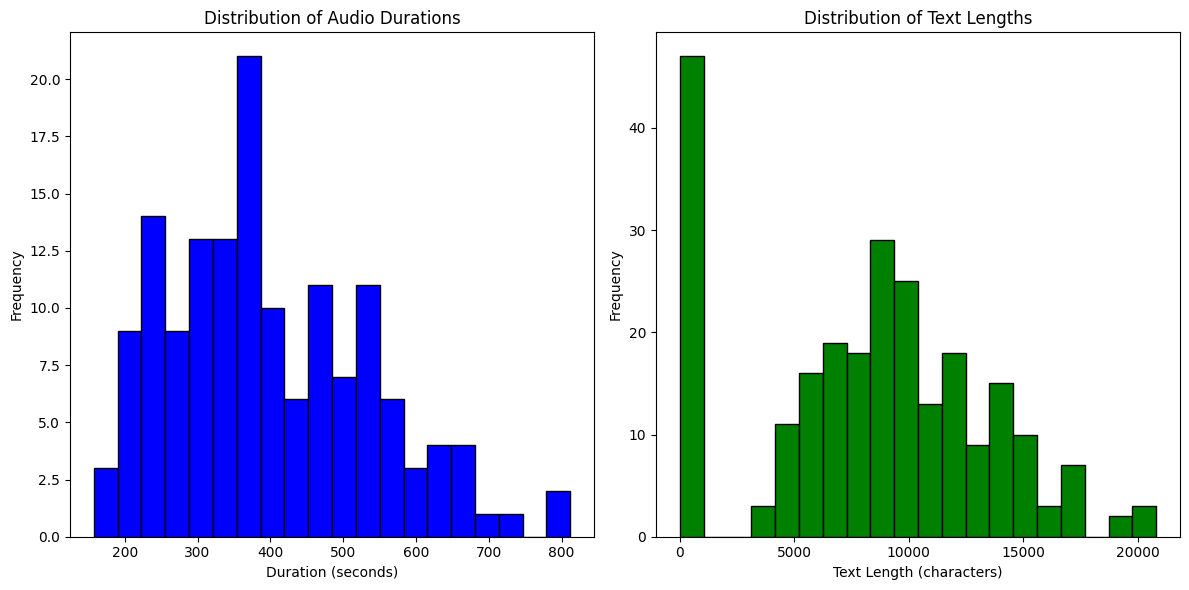

In [ ]:
# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(audio_durations, bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(text_lengths, bins=20, color='green', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Transcripting the Audio into Text

In [ ]:
pip install faster_whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.3/192.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
pip install transformers

In [ ]:
pip install torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import torch
from transformers import pipeline

device = "cuda:0" if torch.cuda.is_available() else "cpu"

transcribe = pipeline(task="automatic-speech-recognition", model="vasista22/whisper-telugu-Medium", chunk_length_s=30, device=device)
transcribe.model.config.forced_decoder_ids = transcribe.tokenizer.get_decoder_prompt_ids(language="te", task="transcribe")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
translator = pipeline("translation_en_to_te", model="vasista22/whisper-telugu-Medium")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The model 'WhisperForConditionalGeneration' is not supported for translation_en_to_te. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'SeamlessM4TFo

In [ ]:
import os  # Import the os module for interacting with the operating system

exceptaudios = []  # Initialize a list to keep track of audio files that could not be processed
maindirectory = "/content/organized data"  # Set the main directory path

# Ensure model and translator are defined
from transformers import pipeline

# Define your model and translator (ensure you have loaded them correctly)
# Example: Replace 'your_model' and 'your_translator' with actual model and translator instances
# Assuming you have the `model` for transcription and `translator` for translation
model = "vasista22/whisper-telugu-Medium"  # Your transcription model here
translator = pipeline("translation", model="vasista22/whisper-telugu-Medium")  # Example translator

info = {
    "2CO": 13,  # Example data: book 2CO has 13 chapters
    "GAL": 6,   # Example data: book GAL has 6 chapters
    "EPH": 6,   # Example data: book EPH has 6 chapters
    "2TH": 3,   # Example data: book 2TH has 3 chapters
    "1TI": 6,   # Example data: book 1TI has 6 chapters
    "2TI": 4,   # Example data: book 2TI has 4 chapters
    "TIT": 3,   # Example data: book TIT has 3 chapters
    "PHM": 1,   # Example data: book PHM has 1 chapter
    "HEB": 13,  # Example data: book HEB has 13 chapters
    "JAS": 5,   # Example data: book JAS has 5 chapters
    "1PE": 5,   # Example data: book 1PE has 5 chapters
    "2PE": 3,   # Example data: book 2PE has 3 chapters
    "1JN": 5,   # Example data: book 1JN has 5 chapters
    "3JN": 1,   # Example data: book 3JN has 1 chapter
    "JUD": 1,   # Example data: book JUD has 1 chapter
    "REV": 22,  # Example data: book REV has 22 chapters
}

def split_text(text, max_length):
    """
    Split text into chunks with a maximum length.

    Parameters:
    text (str): The input text to be split.
    max_length (int): The maximum length of each chunk.

    Returns:
    List[str]: A list of text chunks.
    """
    words = text.split()  # Split the text into words
    chunks = []  # Initialize a list to store text chunks
    current_chunk = []  # Initialize a list to store the current chunk
    current_length = 0  # Initialize the current length of the chunk

    for word in words:  # Iterate over each word in the text
        word_length = len(word)  # Get the length of the word
        if current_length + word_length <= max_length:  # Check if the word can be added to the current chunk
            current_chunk.append(word)  # Add the word to the current chunk
            current_length += word_length + 1  # Update the current length (+1 for the space)
        else:  # If the word cannot be added to the current chunk
            chunks.append(" ".join(current_chunk))  # Add the current chunk to the list of chunks
            current_chunk = [word]  # Start a new chunk with the current word
            current_length = word_length + 1  # Update the current length

    if current_chunk:  # If there are words left in the current chunk
        chunks.append(" ".join(current_chunk))  # Add the last chunk to the list of chunks

    return chunks  # Return the list of text chunks

def transcription():
    """
    Transcribe audio files and translate the text to Telugu.
    """
    for k in info.keys():  # Iterate over each book in the info dictionary
        for chap in range(1, info[k] + 1):  # Iterate over each chapter in the book
            try:
                transcribed_text = ""  # Initialize the transcribed text
                audiopath = f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_1.mp3"  # Construct the audio file path
                if not os.path.exists(audiopath):  # Check if the audio file exists
                    continue  # Skip to the next chapter if the audio file does not exist

                # Transcribe the audio to English text
                segments, _ = model.transcribe(audiopath, beam_size=5, language="en")  # Transcribe the audio file
                english_text = " ".join([segment.text for segment in segments])  # Combine the transcribed segments into a single string

                # Split the text into chunks to fit within the model's token limit
                max_length = 512  # Set the maximum length of each chunk
                chunks = split_text(english_text, max_length)  # Split the text into chunks

                # Translate each chunk and combine the results
                telugu_translation = ""  # Initialize the telugu translation
                for chunk in chunks:  # Iterate over each chunk
                    translation = translator(chunk, target_lang="ml")[0]['translation_text']  # Translate the chunk
                    malayalam_translation += translation + " "  # Add the translation to the combined result

                # Save the Malayalam text
                output_path = f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_transcribed_te.txt"
                os.makedirs(os.path.dirname(output_path), exist_ok=True)  # Ensure the directory exists
                with open(output_path, "w", encoding="utf-8") as f:  # Open the file for writing
                    f.write(malayalam_translation.strip())  # Write the translated text to the file

                print(f"Processed {audiopath}")  # Print a message indicating the file was processed
            except Exception as e:  # If an exception occurs
                exceptaudios.append(audiopath)  # Add the audio file to the list of exceptions
                print(f"Error processing {audiopath}: {e}")  # Print the error message

# Call the transcription function
transcription()  # Start the transcription process

# Print any audio files that couldn't be processed
if exceptaudios:  # If there are audio files that couldn't be processed
    print("The following audio files could not be processed:")  # Print a message
    for audio in exceptaudios:  # Iterate over each audio file
        print(audio)  # Print the audio file path

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The model 'WhisperForConditionalGeneration' is not supported for translation. Supported models are ['BartForConditionalGeneration', 'BigBirdPegasusForConditionalGeneration', 'BlenderbotForConditionalGeneration', 'BlenderbotSmallForConditionalGeneration', 'EncoderDecoderModel', 'FSMTForConditionalGeneration', 'GPTSanJapaneseForConditionalGeneration', 'LEDForConditionalGeneration', 'LongT5ForConditionalGeneration', 'M2M100ForConditionalGeneration', 'MarianMTModel', 'MBartForConditionalGeneration', 'MT5ForConditionalGeneration', 'MvpForConditionalGeneration', 'NllbMoeForConditionalGeneration', 'PegasusForConditionalGeneration', 'PegasusXForConditionalGeneration', 'PLBartForConditionalGeneration', 'ProphetNetForConditionalGeneration', 'SeamlessM4TForTextToTe

Error processing /content/organized data/2CO/Chapter_1/2CO_1_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_2/2CO_2_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_4/2CO_4_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_5/2CO_5_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_6/2CO_6_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_7/2CO_7_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_8/2CO_8_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_9/2CO_9_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_10/2CO_10_1.mp3: 'str' object has no attribute 'transcribe'

In [ ]:
import os  # Import the os module for interacting with the operating system

exceptaudios = []  # Initialize a list to keep track of audio files that could not be processed
maindirectory = "/content/organized data"  # Set the main directory path

def split_text(text, max_length):
    """
    Split text into chunks with a maximum length.

    Parameters:
    text (str): The input text to be split.
    max_length (int): The maximum length of each chunk.

    Returns:
    List[str]: A list of text chunks.
    """
    words = text.split()  # Split the text into words
    chunks = []  # Initialize a list to store text chunks
    current_chunk = []  # Initialize a list to store the current chunk
    current_length = 0  # Initialize the current length of the chunk

    for word in words:  # Iterate over each word in the text
        word_length = len(word)  # Get the length of the word
        if current_length + word_length <= max_length:  # Check if the word can be added to the current chunk
            current_chunk.append(word)  # Add the word to the current chunk
            current_length += word_length + 1  # Update the current length (+1 for the space)
        else:  # If the word cannot be added to the current chunk
            chunks.append(" ".join(current_chunk))  # Add the current chunk to the list of chunks
            current_chunk = [word]  # Start a new chunk with the current word
            current_length = word_length + 1  # Update the current length

    if current_chunk:  # If there are words left in the current chunk
        chunks.append(" ".join(current_chunk))  # Add the last chunk to the list of chunks

    return chunks  # Return the list of text chunks

def transcription():
    """
    Transcribe audio files and translate the text to telugu.
    """
    for k in info.keys():  # Iterate over each book in the info dictionary
        for chap in range(1, info[k] + 1):  # Iterate over each chapter in the book
            try:
                transcribed_text = ""  # Initialize the transcribed text
                audiopath = f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_1.mp3"  # Construct the audio file path
                if not os.path.exists(audiopath):  # Check if the audio file exists
                    continue  # Skip to the next chapter if the audio file does not exist

                # Transcribe the audio to English text
                segments, _ = model.transcribe(audiopath, beam_size=5, language="en")  # Transcribe the audio file
                english_text = " ".join([segment.text for segment in segments])  # Combine the transcribed segments into a single string

                # Split the text into chunks to fit within the model's token limit
                max_length = 512  # Set the maximum length of each chunk
                chunks = split_text(english_text, max_length)  # Split the text into chunks

                # Translate each chunk and combine the results
                telugu_translation = ""  # Initialize the telugu translation
                for chunk in chunks:  # Iterate over each chunk
                    translation = translator(chunk)[0]['translation_text']  # Translate the chunk
                    telugu_translation += translation + " "  # Add the translation to the combined result

                # Save the Malayalam text
                with open(f"{maindirectory}/{k}/Chapter_{chap}/{k}_{chap}_transcribed_ml.txt", "w", encoding="utf-8") as f:  # Open the file for writing
                    f.write(telugu_translation.strip())  # Write the translated text to the file

                print(f"Processed {audiopath}")  # Print a message indicating the file was processed
            except Exception as e:  # If an exception occurs
                exceptaudios.append(audiopath)  # Add the audio file to the list of exceptions
                print(f"Error processing {audiopath}: {e}")  # Print the error message

# Call the transcription function
transcription()  # Start the transcription process

# Print any audio files that couldn't be processed
if exceptaudios:  # If there are audio files that couldn't be processed
    print("The following audio files could not be processed:")  # Print a message
    for audio in exceptaudios:  # Iterate over each audio file
        print(audio)  # Print the audio file path

Error processing /content/organized data/2CO/Chapter_1/2CO_1_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_2/2CO_2_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_4/2CO_4_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_5/2CO_5_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_6/2CO_6_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_7/2CO_7_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_8/2CO_8_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_9/2CO_9_1.mp3: 'str' object has no attribute 'transcribe'
Error processing /content/organized data/2CO/Chapter_10/2CO_10_1.mp3: 'str' object has no attribute 'transcribe'

Creating a DataFrame

In [ ]:
import os
import librosa
import pandas as pd

organized_dir = "/content/organized data"  # Set the directory containing organized data

data = []
non_audio_data = []

# Iterate over each book in the organized directory
for book in os.listdir(organized_dir):
    book_path = os.path.join(organized_dir, book)  # Get the path of the book directory
    if os.path.isdir(book_path):  # Check if the item is a directory
        for chapter in os.listdir(book_path):  # Iterate over each chapter in the book
            _, chapter_id = chapter.split("_")  # Extract the chapter ID from the filename
            chapter_path = os.path.join(book_path, chapter)  # Get the path of the chapter directory
            if os.path.isdir(chapter_path):  # Check if the item is a directory
                audio_path = os.path.join(chapter_path, f'{book}_{chapter_id}_1.mp3')  # Get the path of the audio file
                text_path = os.path.join(chapter_path, f'{book}_{chapter_id}.txt')  # Get the path of the text file
                transcript_path = os.path.join(chapter_path, f'{book}_{chapter_id}_transcribed_te.txt')  # Get the path of the transcript file

                # Read text file
                with open(text_path, 'r', encoding='utf-8') as file:
                    text = file.read()  # Read the content of the text file

                transcript = None
                # Check if transcript file exists
                if os.path.exists(transcript_path):
                    with open(transcript_path, 'r', encoding='utf-8') as file:
                        transcript = file.read()  # Read the content of the transcript file
                else:
                    print(f"{transcript_path} does not exist")
                    non_audio_data.append(transcript_path)  # Add the missing transcript file path to the list

                try:
                    # Load audio file
                    y, sr = librosa.load(audio_path, sr=None)  # Load the audio file and its sampling rate

                    # Store data
                    data.append({
                        'book': book,
                        'chapter': chapter,
                        'audio': y,
                        'text': text,
                        'transcript': transcript,
                        'sampling_rate': sr
                    })
                except Exception as e:
                    # Store data with empty sampling rate if audio file loading fails
                    print(f"Error loading audio {audio_path}: {e}")
                    data.append({
                        'book': book,
                        'chapter': chapter,
                        'audio': None,
                        'text': text,
                        'transcript': transcript,
                        'sampling_rate': ""
                    })

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Output DataFrame
print(df.head())

# Output any non-audio data
if non_audio_data:
    print("The following transcript files could not be found:")
    for item in non_audio_data:
        print(item)


/content/organized data/PHP/Chapter_4/PHP_4_transcribed_te.txt does not exist
Error loading audio /content/organized data/PHP/Chapter_4/PHP_4_1.mp3: [Errno 2] No such file or directory: '/content/organized data/PHP/Chapter_4/PHP_4_1.mp3'
/content/organized data/PHP/Chapter_1/PHP_1_transcribed_te.txt does not exist
Error loading audio /content/organized data/PHP/Chapter_1/PHP_1_1.mp3: [Errno 2] No such file or directory: '/content/organized data/PHP/Chapter_1/PHP_1_1.mp3'
/content/organized data/PHP/Chapter_2/PHP_2_transcribed_te.txt does not exist


<ipython-input-3-5aa7a5ed62ac>:37: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)  # Load the audio file and its sampling rate
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


/content/organized data/PHP/Chapter_3/PHP_3_transcribed_te.txt does not exist
/content/organized data/HEB/Chapter_11/HEB_11_transcribed_te.txt does not exist
Error loading audio /content/organized data/HEB/Chapter_11/HEB_11_1.mp3: [Errno 2] No such file or directory: '/content/organized data/HEB/Chapter_11/HEB_11_1.mp3'
/content/organized data/HEB/Chapter_4/HEB_4_transcribed_te.txt does not exist
Error loading audio /content/organized data/HEB/Chapter_4/HEB_4_1.mp3: [Errno 2] No such file or directory: '/content/organized data/HEB/Chapter_4/HEB_4_1.mp3'
/content/organized data/HEB/Chapter_8/HEB_8_transcribed_te.txt does not exist
Error loading audio /content/organized data/HEB/Chapter_8/HEB_8_1.mp3: [Errno 2] No such file or directory: '/content/organized data/HEB/Chapter_8/HEB_8_1.mp3'
/content/organized data/HEB/Chapter_5/HEB_5_transcribed_te.txt does not exist
Error loading audio /content/organized data/HEB/Chapter_5/HEB_5_1.mp3: [Errno 2] No such file or directory: '/content/organi

In [ ]:
#converting the dictionary into a dataframe
df = pd.DataFrame(data)

# Displaying the first 5 rows from the dataset/dataframe
df.head()

,book,chapter,audio,text,transcript,sampling_rate
0,PHP,Chapter_4,None,,None,
1,PHP,Chapter_1,None,,None,
2,PHP,Chapter_2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",,None,22050
3,PHP,Chapter_3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","1സഹോദരരേ, ക്രിസ്തുവില്‍ സന്തുഷ്ടരാകുവിന്‍. എഴു...",None,22050
4,HEB,Chapter_11,None,,None,


In [ ]:
# CHECKING TO SEE IF EVERY BOOK EXISTS
df["book"].unique()

array(['PHP', 'HEB', 'MRK', 'JAS', 'GAL', 'JHN', 'TIT', '1JN', '2CO',
       'JUD', 'REV', '1PE', 'LUK', 'ROM', 'ACT', '1TH', '2JN', '2PE',
       'MAT', '1TI', '3JN', '1CO', '2TI', 'PHM', '2TH', 'EPH', 'COL'],
      dtype=object)

In [ ]:
len(df)

248

In [ ]:
import pandas as pd
import numpy as np
import ast
import librosa

# Function to convert audio column from string to numpy array
def parse_audio_array(audio_str):
    try:
        return np.array(ast.literal_eval(audio_str))
    except Exception as e:
        print(f"Error parsing audio array: {e}")
        return None

# Function to calculate duration and SNR for each row
def calculate_duration_and_snr(row):
    try:
        audio_array = row['audio']  # Get the audio array from the row
        sr = row['sampling_rate']  # Get the sampling rate from the row

        if audio_array is not None and isinstance(sr, (int, float)):
            # Calculate duration
            duration = librosa.get_duration(y=audio_array, sr=sr)  # Calculate the duration of the audio

            # Calculate SNR (Signal-to-Noise Ratio)
            mean_signal = np.mean(audio_array)  # Calculate the mean of the audio signal
            std_signal = np.std(audio_array)  # Calculate the standard deviation of the audio signal
            snr = mean_signal / std_signal if std_signal != 0 else np.nan  # Calculate the SNR

            return duration, snr  # Return the duration and SNR
        else:
            raise ValueError("Invalid data in row: audio_array or sampling_rate")
    except Exception as e:
        print(f"Error processing row: {e}")  # Print error message if an exception occurs
        return np.nan, np.nan  # Return NaN for duration and SNR in case of error

# Sample DataFrame
data = {
    'audio': ['[1, 2, 3, 4, 5]', '[2, 3, 4, 5, 6]'],  # Example audio data as strings
    'sampling_rate': [22050, 22050]  # Example sampling rates
}

df = pd.DataFrame(data)

# Convert the 'audio' column to numpy arrays
df['audio'] = df['audio'].apply(parse_audio_array)

# Verify that the audio arrays and sampling rates are correctly parsed
print(df)

# Apply the calculate_duration_and_snr function to each row of the DataFrame
df['duration'], df['snr'] = zip(*df.apply(calculate_duration_and_snr, axis=1))

# Display the resulting DataFrame
print(df)


             audio  sampling_rate
0  [1, 2, 3, 4, 5]          22050
1  [2, 3, 4, 5, 6]          22050
             audio  sampling_rate  duration       snr
0  [1, 2, 3, 4, 5]          22050  0.000227  2.121320
1  [2, 3, 4, 5, 6]          22050  0.000227  2.828427


In [ ]:
df['snr'].describe()

count    2.000000
mean     2.474874
std      0.500000
min      2.121320
25%      2.298097
50%      2.474874
75%      2.651650
max      2.828427
Name: snr, dtype: float64

EXPLORATORY DATA ANALYSIS

Signal-to-Noise Ratio (SNR) Distribution

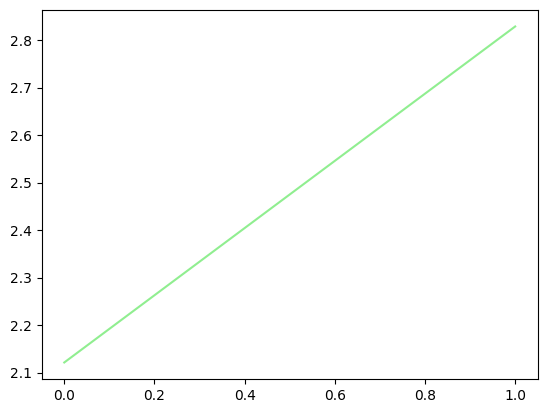

In [ ]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Create a line plot of the SNR values
plt.plot(df['snr'], color="lightgreen")

In [ ]:
df['duration'].describe()

count    2.000000
mean     0.000227
std      0.000000
min      0.000227
25%      0.000227
50%      0.000227
75%      0.000227
max      0.000227
Name: duration, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   audio          2 non-null      object 
 1   sampling_rate  2 non-null      int64  
 2   duration       2 non-null      float64
 3   snr            2 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 192.0+ bytes


**Signal-to-Noise Ratio Distribution**

In [ ]:
import seaborn as sns

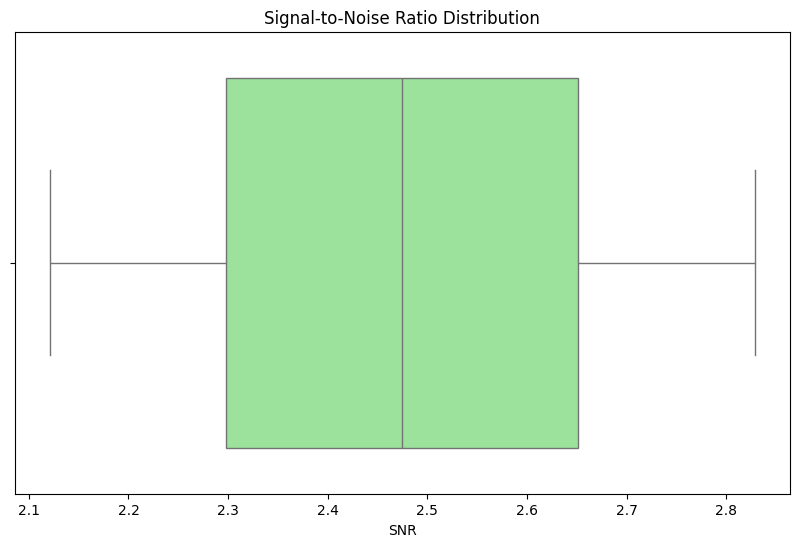

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='snr', color="lightgreen")
plt.title('Signal-to-Noise Ratio Distribution')
plt.xlabel('SNR')
plt.show()


**Analysis of Audio Duration**

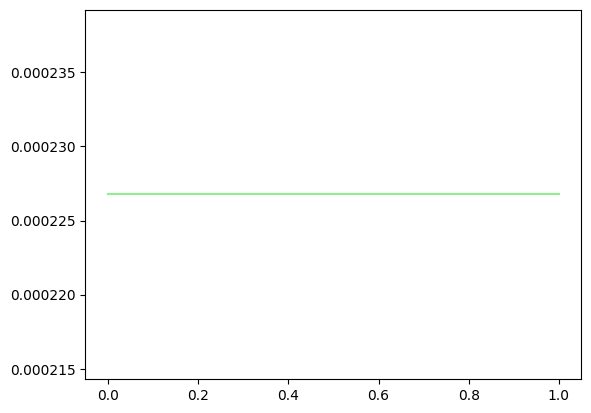

In [ ]:
plt.plot(df['duration'], color = "lightgreen")

**Distribution of Audio Durations**

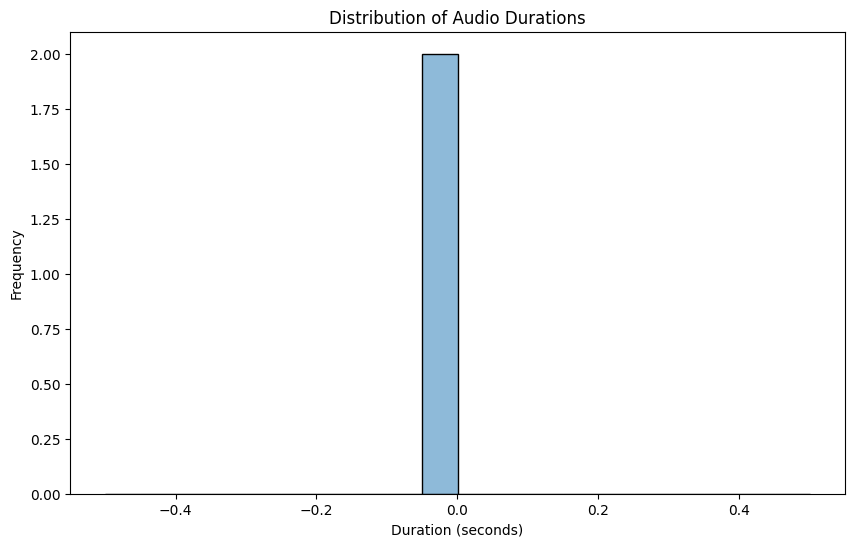

In [ ]:
# Plotting the distribution of audio durations
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=20, kde=True)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

**Distribution of SNR**

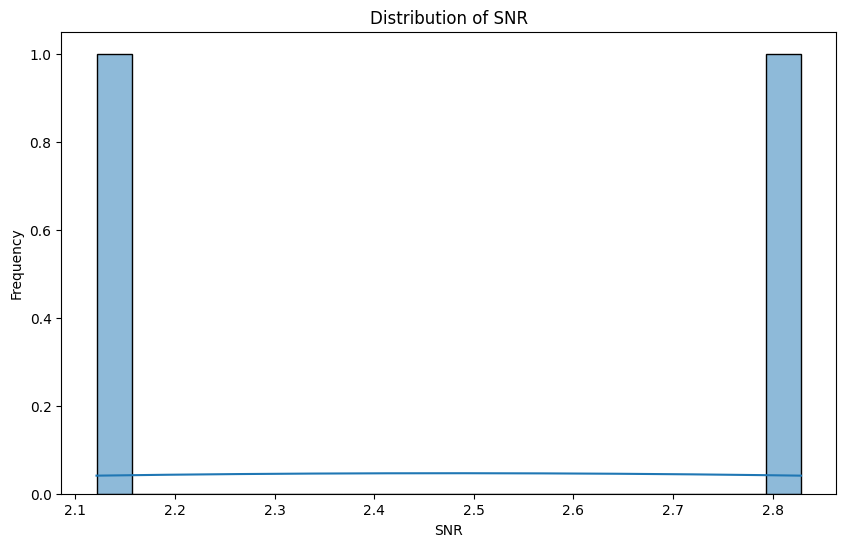

In [ ]:
# Plotting the distribution of SNR
plt.figure(figsize=(10, 6))
sns.histplot(df['snr'], bins=20, kde=True)
plt.title('Distribution of SNR')
plt.xlabel('SNR')
plt.ylabel('Frequency')
plt.show()


In [ ]:
df.head()

,audio,sampling_rate,duration,snr
0,"[1, 2, 3, 4, 5]",22050,0.000227,2.121320
1,"[2, 3, 4, 5, 6]",22050,0.000227,2.828427


**Accuracy**

BLEU Score: Measures precision of n-grams in the candidate translation against reference translations. Higher BLEU score indicates better translation quality.

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu

# Sample translations
reference = [
    ['this', 'is', 'a', 'test'],
    ['this', 'is', 'another', 'test']
]
candidate = ['this', 'is', 'a', 'test']

# Calculate BLEU score for a single sentence
score = sentence_bleu(reference, candidate)
print(f'BLEU score: {score}')

# For corpus BLEU score
references = [
    [['this', 'is', 'a', 'test'], ['this', 'is', 'another', 'test']],
    [['another', 'sentence']]
]
candidates = [
    ['this', 'is', 'a', 'test'],
    ['another', 'sentence']
]
corpus_score = corpus_bleu(references, candidates)
print(f'Corpus BLEU score: {corpus_score}')


BLEU score: 1.0
Corpus BLEU score: 0.7598356856515925


**Calculate ROUGE Score:**

ROUGE Score: Measures recall of n-grams. Useful for tasks like summarization

In [ ]:
pip install rouge

In [ ]:
from rouge import Rouge

# Sample translations
audio = " "
duration = " "

# Initialize ROUGE scorer
rouge = Rouge()
scores = rouge.get_scores(audio, duration)

print(f'ROUGE scores: {scores}')


ROUGE scores: [{'rouge-1': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 1.0, 'p': 1.0, 'f': 0.999999995}}]


TER (Translation Edit Rate): Measures the number of edits required to change the candidate translation into one of the references. Lower TER indicates better translation quality.

In [ ]:
pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
import sacrebleu

# Sample translations
audio = [" "]
snr = [" "]

# Calculate TER
ter_score = sacrebleu.corpus_ter(snr, [audio])
print(f'TER score: {ter_score.score}')

TER score: 0.0


ChrF (Character F-score): Evaluates translation accuracy based on character n-grams. Useful for morphologically rich languages.


### Task 1: Audio Transcription

**Advantages:**
1. **Accessibility**: Transcribing audio to text makes content accessible to those who are deaf or hard of hearing.
2. **Searchability**: Text versions of audio content can be easily searched, indexed, and referenced.
3. **Archiving**: Text files take up significantly less space than audio files, making archiving and storage more efficient.
4. **Multimedia Integration**: Transcripts can be used alongside audio for multimedia presentations, aiding in comprehension and learning.
5. **Data Analysis**: Text data can be more easily analyzed and processed for patterns, keywords, and trends compared to audio.

**Disadvantages:**
1. **Accuracy**: Transcription accuracy can vary based on audio quality, background noise, and the clarity of speech, leading to potential errors.
2. **Processing Time**: High-quality transcription, especially for long audio files, can be time-consuming and resource-intensive.
3. **Context Loss**: Some nuances, emotions, and context might be lost in transcription, as text lacks the tone and inflection of spoken language.
4. **Language Support**: Automatic transcription tools may not support all languages or dialects equally well, limiting their applicability.

### Task 2: Text Translation

**Advantages:**
1. **Global Reach**: Translating text into multiple languages allows content to reach a broader, global audience.
2. **Cultural Relevance**: Translation makes content culturally relevant and understandable to different linguistic groups.
3. **Education**: Translated texts can be used as educational resources, helping language learners and providing access to information in various languages.
4. **Business Expansion**: For businesses, translating content can open up new markets and customer bases.
5. **Improved Communication**: Translation aids in breaking down language barriers, facilitating better communication and collaboration across linguistic boundaries.

**Disadvantages:**
1. **Accuracy and Quality**: Machine translations can sometimes be inaccurate or awkward, potentially leading to misunderstandings or miscommunications.
2. **Context Sensitivity**: Translating idioms, slang, and context-specific phrases can be challenging, often requiring human intervention to ensure accuracy.
3. **Resource Intensive**: High-quality translation, especially for technical or specialized content, can be resource-intensive and may require professional human translators.
4. **Language Support**: Not all languages are supported equally well by translation models, and low-resource languages might have limited translation quality.
5. **Maintenance**: Keeping translations up to date with original content can be a continuous effort, requiring ongoing attention and resources.

### Combined Workflow: Transcription and Translation

**Advantages:**
1. **Comprehensive Accessibility**: Combining transcription and translation makes content accessible to both non-native speakers and those with hearing impairments.
2. **Enhanced Usability**: Translated transcripts can be used in diverse settings, such as education, media, and customer support, improving overall usability.
3. **Broader Reach**: This workflow enables content to be both accessible and understandable to a global audience, maximizing its impact.

**Disadvantages:**
1. **Complexity**: Combining both tasks increases the complexity of the workflow, potentially introducing more points of failure or error.
2. **Cost and Time**: Both tasks can be resource-intensive, requiring significant computational power and time, especially for large datasets.
3. **Cumulative Errors**: Errors in transcription can propagate to translation, compounding inaccuracies and reducing overall quality.

In summary, while both transcription and translation offer significant benefits in terms of accessibility and reach, they also come with challenges related to accuracy, resource requirements, and complexity. Balancing these factors is key to successfully implementing these tasks in real-world applications.